# Práctico 4 - Procesamiento Digital de Imágenes

In [42]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

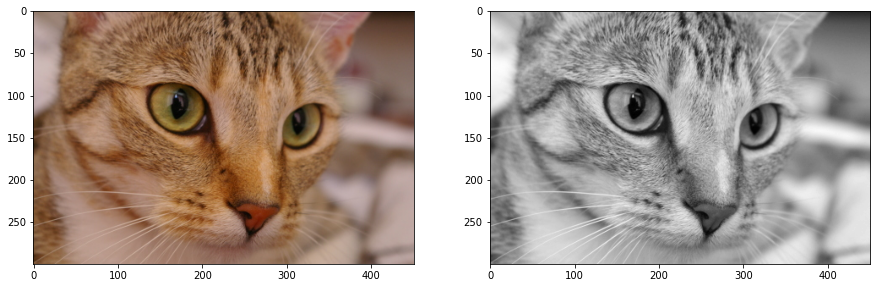

In [44]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

# 1. Transformada Discreta de Fourier 

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica
2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible
3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original 
4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit
5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

Text(0.5, 1.0, 'Imagen reconstruida [RMSE = 0.5227426843374264]')

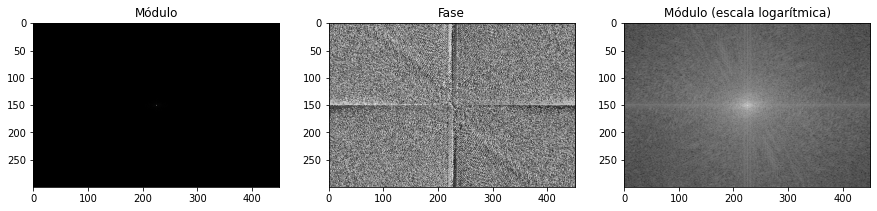

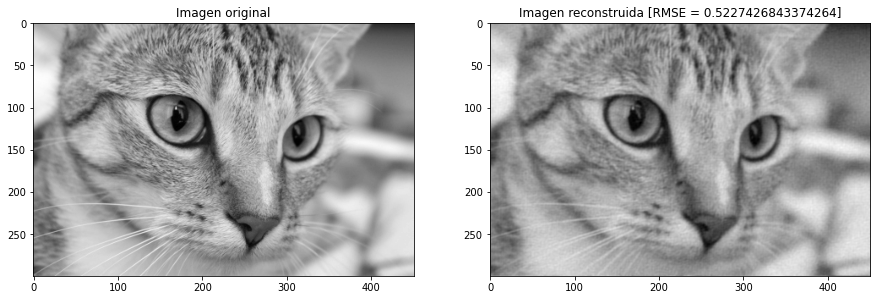

In [45]:
# fooplot
# np.fft.fft2 help

def fft(img):
    N, M = img.shape
    X = np.fft.fftshift(np.fft.fft2(img)) * 1/(M*N)
    Xm = np.abs(X)
    Xp = np.angle(X)
    
    return Xm, Xp  

def transform(img):
    Xm, Xp = fft(img)
    
    ## diferentes transformaciones
    #Xm = np.log10(25*Xm + 1)
    Xm = np.log10(100*Xm + 1)/2
    #Xm = Xm**(1/4)
    
    Xp = (Xp + np.pi) 
    
    Xm = (Xm - Xm.min()) / (Xm.max() - Xm.min()) * 255
    Xp = (Xp - Xp.min()) / (Xp.max() - Xp.min()) * 255
    
    return Xm, Xp
  
    
def inverse_transform(Xm, Xp, shape):
    
    X = (10**(Xm*2)- 1) / 100 * np.exp(1j * ((Xp * (2*np.pi)) - np.pi))
    #X = (Xm**4)* np.exp(1j * ((Xp * (2*np.pi)) - np.pi))
    
    img = np.fft.ifft2(np.fft.ifftshift(X)) * shape
    
    return  np.abs(img)
    
# fft
Xm, Xp = fft(img)
#plots
_, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(Xm, 'gray')
axes[0].set_title('Módulo')
axes[1].imshow(Xp, 'gray')
axes[1].set_title('Fase')
axes[2].imshow(np.log10(Xm), 'gray') # escala logarítmica
axes[2].set_title('Módulo (escala logarítmica)')  

# transformada de espectros
Xm, Xp = transform(img)
imageio.imsave('chelsea_mod.png', Xm.astype(np.uint8))
imageio.imsave('chelsea_phase.png', Xp.astype(np.uint8))

N, M = img.shape
# reconstruyo imagen
Xm = imageio.imread('chelsea_mod.png')/255
Xp = imageio.imread('chelsea_phase.png')/255
img_reconstruida = inverse_transform(Xm, Xp, M*N)

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img, 'gray')
axes[0].set_title('Imagen original') 
axes[1].imshow(img_reconstruida, 'gray')
axes[1].set_title('Imagen reconstruida [RMSE = ' + str(rmse(img,img_reconstruida)) + ']') 


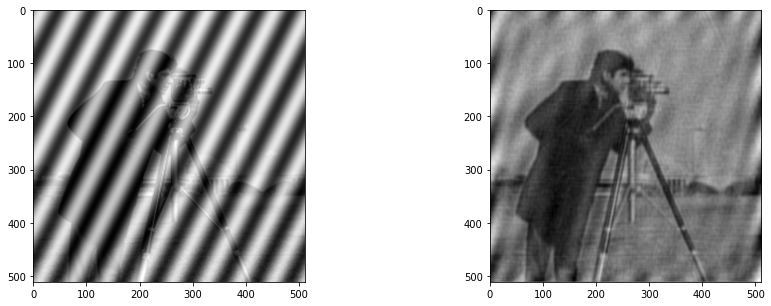

In [46]:
#tp4.png

img_camera = imageio.imread('tp4.png')/255
N, M = img_camera.shape
Xm, Xp = fft(img_camera)

# transformada de espectros
Xm, Xp = transform(img_camera)
imageio.imsave('tp4_amp.png', Xm.astype(np.uint8))
imageio.imsave('tp4_phase.png', Xp.astype(np.uint8))

# imagen modificada
Xm = imageio.imread('tp4_amp_modificado.png')[:,:,0]/255
Xp = imageio.imread('tp4_phase.png')/255
img_camera_modificada = (inverse_transform(Xm, Xp, M*N))

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_camera, 'gray')
axes[1].imshow(np.abs(img_camera_modificada), 'gray')
